In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
from keras.models import Sequential
from keras import layers
from keras.preprocessing.text import Tokenizer
import pandas as pd
from keras.layers import Flatten
from keras.layers.embeddings import Embedding
from keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.datasets import fetch_20newsgroups
from tensorflow.keras import datasets, layers, models
from tensorflow import keras
from sklearn.model_selection import train_test_split

df = pd.read_csv('/content/drive/MyDrive/imdb_master.csv',encoding='latin-1')
print(df.head())
sentences = df['review'].values
y = df['label'].values

   Unnamed: 0  type  ... label         file
0           0  test  ...   neg      0_2.txt
1           1  test  ...   neg  10000_4.txt
2           2  test  ...   neg  10001_1.txt
3           3  test  ...   neg  10002_3.txt
4           4  test  ...   neg  10003_3.txt

[5 rows x 5 columns]


In [8]:
max_review_len= max([len(s.split()) for s in sentences])
#tokenizing data
tokenizer = Tokenizer(num_words=max_review_len)
tokenizer.fit_on_texts(sentences)

#getting the vocabulary of data
vocab_size= len(tokenizer.word_index)+1
sentences = tokenizer.texts_to_sequences(sentences)
padded_docs= pad_sequences(sentences,maxlen=max_review_len)
le = preprocessing.LabelEncoder()
y = le.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(padded_docs, y, test_size=0.25, random_state=1000)

# Number of features
model = Sequential()

#Embedded Layer is added
model.add(Embedding(vocab_size, 50, input_length=max_review_len))
model.add(layers.Flatten())
model.add(layers.Dense(300,activation='relu'))
model.add(layers.Dense(3, activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['acc'])
history=model.fit(X_train,y_train, epochs=5, verbose=True, validation_data=(X_test,y_test), batch_size=256)

#Calculating the loss and accuracy by evaluating the data
[train_loss, train_acc] = model.evaluate(X_test,y_test)
print("Evaluation result on Train Data : Loss = {}, accuracy = {}".format(train_loss, train_acc))

Epoch 1/5
293/293 [==============================] - 483s 2s/step - loss: 1.5517 - acc: 0.4686 - val_loss: 0.8588 - val_acc: 0.5028
Epoch 2/5
293/293 [==============================] - 513s 2s/step - loss: 0.8428 - acc: 0.5165 - val_loss: 0.8304 - val_acc: 0.5110
Epoch 3/5
293/293 [==============================] - 539s 2s/step - loss: 0.7953 - acc: 0.5476 - val_loss: 0.8325 - val_acc: 0.5032
Epoch 4/5
293/293 [==============================] - 528s 2s/step - loss: 0.7405 - acc: 0.6059 - val_loss: 0.8567 - val_acc: 0.5027
Epoch 5/5
782/782 [==============================] - 73s 94ms/step - loss: 0.9409 - acc: 0.4915
Evaluation result on Train Data : Loss = 0.9409086108207703, accuracy = 0.4914799928665161


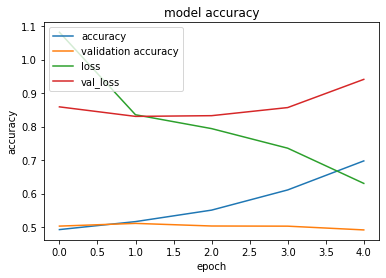

In [10]:
# plotting loss and accuracy using history obj
import matplotlib.pyplot as plt
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['accuracy', 'validation accuracy','loss','val_loss'], loc='upper left')
plt.show()